In [11]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist

# 数据集加载

In [17]:
(train_images,train_labels),(test_images,test_labels) = mnist.load_data()

In [18]:
train_images.shape

(60000, 28, 28)

In [19]:
test_images.shape

(10000, 28, 28)

In [20]:
train_labels.shape

(60000,)

# 数据处理

In [31]:
# 维度调整
train_images = tf.reshape(train_images,(train_images.shape[0],train_images.shape[1],train_images.shape[2],1))

In [32]:
test_images = tf.reshape(test_images,(test_images.shape[0],test_images.shape[1],test_images.shape[2],1))

In [9]:
test_images.shape

TensorShape([10000, 28, 28, 1])

# 模型构建

In [43]:
net = tf.keras.models.Sequential([
    # 卷积层：6个5*5的卷积 sigmoid
    tf.keras.layers.Conv2D(filters=6, kernel_size=5,
                           activation="sigmoid", input_shape=(28, 28, 1)),
    # max pooling
    tf.keras.layers.MaxPool2D(pool_size=2, strides=2),
    # 卷积层：16 5*5 sigmoid
    tf.keras.layers.Conv2D(filters=16, kernel_size=5, activation="sigmoid"),
    # max pooling
    tf.keras.layers.MaxPool2D(pool_size=2, strides=2),
    # 维度调整
    tf.keras.layers.Flatten(),
    # 全连接层，sigmoid
    tf.keras.layers.Dense(120, activation="sigmoid"),
    # 全连接层，sigmoid
    tf.keras.layers.Dense(84, activation="sigmoid"),
    # 输出层 softmax
    tf.keras.layers.Dense(10, activation="softmax")
])

In [44]:
net.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 24, 24, 6)         156       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 12, 12, 6)         0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 8, 8, 16)          2416      
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 4, 4, 16)          0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 256)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 120)               30840     
_________________________________________________________________
dense_13 (Dense)             (None, 84)               

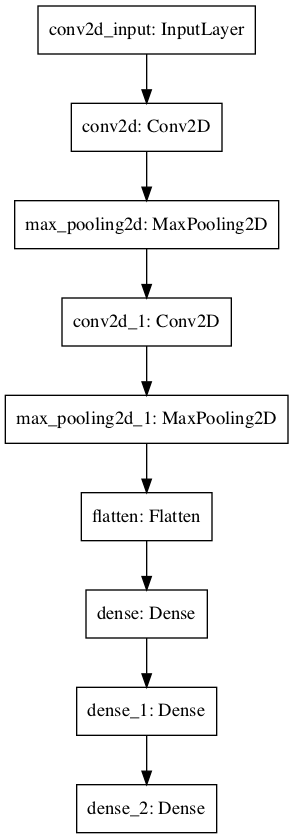

In [12]:
tf.keras.utils.plot_model(net)

# 模型编译

In [39]:
# 设置优化器，损失函数 评价指标
net.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.9),
           loss = tf.keras.losses.sparse_categorical_crossentropy,
           metrics=["accuracy"])

# 模型训练

In [40]:
net.fit(train_images,train_labels,epochs=5,batch_size=128,verbose=1)

Epoch 1/5
469/469 [==============================] - 7s 15ms/step - loss: 1.3091 - accuracy: 0.5253
Epoch 2/5
469/469 [==============================] - 7s 15ms/step - loss: 0.2174 - accuracy: 0.9317
Epoch 3/5
469/469 [==============================] - 7s 15ms/step - loss: 0.1280 - accuracy: 0.9596
Epoch 4/5
469/469 [==============================] - 7s 15ms/step - loss: 0.1100 - accuracy: 0.9653
Epoch 5/5
469/469 [==============================] - 10s 22ms/step - loss: 0.0853 - accuracy: 0.9727


# 模型评估

In [32]:
net.evaluate(test_images,test_labels,verbose=1)

313/313 [==============================] - 1s 2ms/step - loss: 0.0579 - accuracy: 0.9806


[0.05785652995109558, 0.9805999994277954]